## <b> Ch 3. (실습) 머신러닝 예측 모델 구현하기 </b>

### 과제1: 소득구간 예측

### 데이터 소개
  
- US Census Bureau에서 수집하고 UCI에서 배포한 US Adult Income 데이터셋에 강사가 자체 제작한 모의 변수를 추가·수정한 데이터를 사용합니다.
- 첫번째로 사용할 데이터는 US Adult Income 데이터셋이며 분류할 타겟 레이블과 변수(피처)는 아래와 같습니다.

  - `age` : 나이
  - `workclass`: 직업구분
  - `education`: 교육수준
  - `education.num`: 교육수준(numerically coded)
  - `marital.status`: 혼인상태
  - `occupation` : 직업
  - `relationship`: 가족관계
  - `race`: 인종
  - `sex`: 성별
  - `capital.gain`: 자본이득
  - `capital.loss`: 자본손실
  - `hours.per.week`: 주당 근로시간
  - `income` : 소득 구분
 

원 데이터 출처: https://archive.ics.uci.edu/ml/datasets/adult

### 데이터 불러오기

In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
datapath = 'https://github.com/mchoimis/tsdl/raw/main/income/'
df = pd.io.parsers.read_csv(datapath + 'income.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 데이터 미리보기

In [ ]:
# 데이터 형태 확인

print(df.shape)
print(df.columns)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB




```
# 코드로 형식 지정됨
```

### 데이터 확인하기

In [ ]:
# 결측치를 NaN으로 바꾸기
df[df=='?'] = np.nan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# 최빈값으로 결측치 채우기
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# 결과 확인하기

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### 인풋 피처와 타겟값 만들기

In [ ]:
X =  df.drop(['income', 'education', 'fnlwgt'], axis = 1)
y =  df['income']

In [ ]:
X.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [ ]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

###  원 데이터를 training set과 test set으로 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,State-gov,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States
25206,39,Local-gov,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States
23491,42,Private,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
12367,27,Local-gov,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
7054,38,Federal-gov,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


In [ ]:
X_test.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
22278,56,Private,5,Widowed,Sales,Unmarried,White,Female,0,0,40,United-States
8950,19,Private,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,25,United-States
7838,23,Private,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Female,0,0,35,Vietnam
16505,37,Federal-gov,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
19140,49,Private,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9769 entries, 22278 to 20721
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9769 non-null   int64 
 1   workclass       9769 non-null   object
 2   education.num   9769 non-null   int64 
 3   marital.status  9769 non-null   object
 4   occupation      9769 non-null   object
 5   relationship    9769 non-null   object
 6   race            9769 non-null   object
 7   sex             9769 non-null   object
 8   capital.gain    9769 non-null   int64 
 9   capital.loss    9769 non-null   int64 
 10  hours.per.week  9769 non-null   int64 
 11  native.country  9769 non-null   object
dtypes: int64(5), object(7)
memory usage: 992.2+ KB


### 범주변수 처리하기 

In [ ]:
from sklearn import preprocessing

categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le =  preprocessing.LabelEncoder()
        X_train[feature] =  le.fit_transform(X_train[feature]) 
        X_test[feature] =   le.transform(X_test[feature]) 

In [ ]:
# 변환된 범주변수 컬럼 확인하기(X_train)
X_train[categorical].head(3)

,workclass,marital.status,occupation,relationship,race,sex,native.country
32098,6,2,3,5,4,0,38
25206,1,2,6,0,4,1,38
23491,3,4,3,1,4,0,38


In [ ]:
# 변환된 범주변수 컬럼 확인하기(X_test)
X_test[categorical].head(3)

,workclass,marital.status,occupation,relationship,race,sex,native.country
22278,3,6,11,4,4,0,38
8950,3,4,5,3,4,0,38
7838,3,4,7,1,1,0,39


### 참고: 범주변수의 처리
범주변수의 처리 방법은 크게 2가지로 나눌 수 있습니다.

- 클래스를 숫자로 변환
- 원-핫-인코딩(더미코딩)
    - 차원이 너무 높아짐
    - sparse함 null이 많음
    - 차원 축소 필요
    - 딥러닝에서 많이 사용

### 피처 스케일 조정하기

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [ ]:
 # 스케일 조정된 X_train 데이터 확인하기

# X_train_head()
X_train_scaled.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


In [ ]:
print(min(X_train['age']))
print(max(X_train['age']))
print(np.mean(X_train['age']))
print(np.var(X_train['age']))
print('\n')
print(min(X_test['age']))
print(max(X_test['age']))
print(np.mean(X_test['age']))
print(np.var(X_test['age']))

17
90
38.61429448929449
186.44402697680712


17
90
38.505476507319074
185.14136114309127


In [ ]:
print(min(X_train_scaled['age']))
print(max(X_train_scaled['age']))
print(np.mean(X_train_scaled['age']))
print(np.var(X_train_scaled['age']))
print('\n')
print(min(X_test_scaled['age']))
print(max(X_test_scaled['age']))
print(np.mean(X_test_scaled['age']))
print(np.var(X_test_scaled['age']))

-1.5829486507307393
3.7632934651328265
1.7567165303651125e-16
1.0


-1.5829486507307393
3.7632934651328265
-0.007969414769866482
0.9930130996694361


### 참고: scikit-learn에서 제공하는 피처 스케일러(scaler)

- `StandardScaler`: 기본 스케일, 각 피처의 평균을 0, 표준편차를 1로 변환
- `RobustScaler`: 위와 유사하지만 평균 대신 중간값(median)과 일분위, 삼분위값(quartile)을 사용하여 이상치 영향을 최소화
- `MinMaxScaler`: 모든 피처의 최대치와 최소치가 각각 1, 0이 되도록 스케일 조정
- `Normalizer`: 피처(컬럼)이 아니라 row마다 정규화되며, 유클리드 거리가 1이 되도록 데이터를 조정하여 빠르게 학습할 수 있게 함

<p> 스케일 조정을 하는 이유는 데이터의 값이 너무 크거나 작을 때 학습이 제대로 되지 않을 수도 있기 때문입니다. 또한 스케일의 영향이 절대적인 분류기(예: knn과 같은 거리기반 알고리즘)의 경우, 스케일 조정을 필수적으로 검토해야 합니다.
    
<p> 반면 어떤 항목은 원본 데이터의 분포를 유지하는 것이 나을 수도 있습니다. 예를 들어, 데이터가 거의 한 곳에 집중되어 있는 feature를 표준화시켜 분포를 같게 만들었을 때, 작은 단위의 변화가 큰 차이를 나타내는 것처럼 학습될 수도 있습니다. 또한 스케일의 영향을 크게 받지 않는 분류기(예: 트리 기반 앙상블 알고리즘)를 사용할 경우에도 성능이 준수하게 나오거나 과대적합(overfitting)의 우려가 적다면 생략할 수도 있습니다.
    
<p> 스케일 조정시 유의해야할 점은 원본 데이터의 의미를 잃어버릴 수 있다는 것입니다. 최종적으로 답을 구하는 것이 목적이 아니라 모델의 해석이나 향후 다른 데이터셋으로의 응용이 더 중요할 때 원 피처에 대한 설명력을 잃어버린다면 모델 개선이 어려울 수도 있습니다. 이 점을 함께 고려하시면 좋겠습니다.

### 주요 알고리즘의 구현

### 원 데이터를 이용하여 Logistic Regression 모델 돌려보기

In [ ]:
# Feature scaling 전 원본 데이터
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg =  LogisticRegression() ###
logreg.fit(X_train, y_train)

LogisticRegression()

### 원 데이터를 이용한 Logistic Regression 모델의 정확도 확인하기

In [ ]:
y_pred =  logreg.predict(X_test)
# logreg_score =  accuracy_score(y_test, y_pred)
print('Logistic Regression accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score: 0.8057


### 스케일 조정된 데이터를 이용하여 Logistic Regression 모델 돌려보기

In [ ]:
# Feature scaling 후 변환 데이터
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train) ##

LogisticRegression()

### 스케일 조정된 데이터를 이용한 Logistic Regression 모델의 정확도 확인하기

In [ ]:
y_pred_scaled_data = logreg.predict(X_test_scaled)  ##
logreg_score =  accuracy_score(y_test, y_pred_scaled_data)
print('Logistic Regression (scaled data) accuracy score: {0:0.4f}'. format(logreg_score))

Logistic Regression (scaled data) accuracy score: 0.8222


In [ ]:
# 예측된 값 확인하기
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
y_pred_scaled_data

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

###  스케일 조정된 데이터를 이용한 Logistic Regression 모델 분류결과 확인하기

In [ ]:
from sklearn.metrics import classification_report

cm_logreg_scaled_data =  classification_report(y_test, y_pred_scaled_data) 
print(cm_logreg_scaled_data)

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7410
        >50K       0.71      0.44      0.55      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



### Random Forest 모델 구현하고 정확도 확인하기

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# 분류 모델 하이퍼 파라미터 예시
criterion='gini' # The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain (정보 이득)
n_estimators=100 # The number of trees in the forest.

In [ ]:
y_pred = rfc.predict(X_test) 
rfc_score =  accuracy_score(y_test, y_pred)
print('Random Forest Model accuracy score : {0:0.4f}'. format(rfc_score ))

Random Forest Model accuracy score : 0.8475


### Random Forest 모델의 Confusion Matrix 확인하기

In [ ]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Binary Labels \n')
# print('Confusion Matrix for Binary Labels\n')
# print('Actual class')
# print('Predicted', '[[True Positive', 'False Positive]')
# print('         ', '[False Negative', 'True Negative]]')
print(cm)

Confusion Matrix for Binary Labels 

[[6849  561]
 [ 929 1430]]


In [ ]:
# Confusion Matrix에서 Recall과 Precision 계산하기

print('\nRecall for Class [<=50K] = ', cm[0,0], '/' , cm[0,0] + cm[0,1])
print('\nPrecision for Class [<=50K] = ', cm[0,0], '/' , cm[0,0] + cm[1,0])
print('\nRecall for Class [>50K] = ', cm[1,1], '/' , cm[1,0] + cm[1,1])
print('\nPrecision for Class [>50K] = ', cm[1,1], '/' , cm[0,1] + cm[1,1])


Recall for Class [<=50K] =  6849 / 7410

Precision for Class [<=50K] =  6849 / 7778

Recall for Class [>50K] =  1430 / 2359

Precision for Class [>50K] =  1430 / 1991


### Random Forest 모델의 분류결과 확인하기

In [ ]:
from sklearn.metrics import classification_report

cm_rfc =  classification_report(y_test, y_pred)
print(cm_rfc)

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7410
        >50K       0.72      0.61      0.66      2359

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



### Gradient Boosting 모델 구현하고 정확도 확인하기

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =  GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
y_pred =  gbc.predict(X_test)
gbc_score =  accuracy_score(y_test, y_pred)
print('Gradient Boosting accuracy score : {0:0.4f}'.format(gbc_score))

Gradient Boosting accuracy score : 0.8621


### Gradient Boosting 모델의 분류결과 확인하기

In [ ]:
from sklearn.metrics import classification_report

cm_gbc =  classification_report(y_test, y_pred)
print(cm_gbc)

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7410
        >50K       0.78      0.59      0.68      2359

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769



### Light GBM 구현하고 정확도 확인하기



In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm =  LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
y_pred =  lgbm.predict(X_test)

lgbm_score =  accuracy_score(y_test, y_pred)
print('LGBM Model accuracy score : {0:0.4f}'.format(lgbm_score))

LGBM Model accuracy score : 0.8696


### Light GBM 분류결과 확인하기

In [ ]:
from sklearn.metrics import classification_report

cm_lgbm =  classification_report(y_test, y_pred)
print(cm_lgbm)

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      7410
        >50K       0.77      0.65      0.71      2359

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



### 요약: 소득 이진분류 예측모델의 정확도 비교하기

In [ ]:
print ('Accuracy Comparisons for Binary Models\n')
print ('logreg_score:', '{0:0.5f}'.format(logreg_score))
print ('rfc_score   :', '{0:0.5f}'.format(rfc_score))
print ('gbc_score   :', '{0:0.5f}'.format(gbc_score ))
print ('lgbm_score  :', '{0:0.5f}'.format(lgbm_score))

Accuracy Comparisons for Binary Models

logreg_score: 0.82219
rfc_score   : 0.84748
gbc_score   : 0.86211
lgbm_score  : 0.86959


### 최종 이진분류 모델 비교하기

In [ ]:
print ('Classification Comparions for Binary Models\n')
print ('logreg_score:', '{0:0.4f}'.format(logreg_score))
print (cm_logreg_scaled_data)
print ('rfc_score   :', '{0:0.4f}'.format(rfc_score))
print (cm_rfc)
print ('gbc_score   :', '{0:0.4f}'.format(gbc_score ))
print (cm_gbc)
print ('lgbm_score  :', '{0:0.4f}'.format(lgbm_score))
print (cm_lgbm)

Classification Comparions for Binary Models

logreg_score: 0.8222
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7410
        >50K       0.71      0.44      0.55      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

rfc_score   : 0.8475
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7410
        >50K       0.72      0.61      0.66      2359

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

gbc_score   : 0.8621
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7410
        >50K       0.78      0.59      0.68      2359

    accuracy                           0.86      9769
   macro avg       0

## <b> Ch 4. (실습) 예측 결과 평가하기</b> 

### 알고리즘 성과 비교

- <a href="https://www.medric.or.kr/Controls/Sub.aspx?d=03&s=02&s2=01&g=TENDENCY&c&m=VIEW&i=3455">COVID-19 세가지 진단검사 비교 : 비인두도말 PCR, 타액 PCR, 신속항원검사</a> (출처: 국가지정 의과학연구정보센터)

- <a target="_blank" href="http://medicalworldnews.co.kr/m/view.php?idx=1510947740">코로나19 자가검사키트 정확도…민감도·특이도와 양성예측도란?</a>


- <a href = "https://blog.naver.com/kfdazzang/222640236513"> 민감도 90%로 허가받은 자가검사키트, 검사 현장에서 양성예측도가 76%인 이유는?</a>

### 머신러닝 결과의 시각화(1)

In [ ]:
### 구축한 머신러닝 모델과 데이터 불러오기

모델 및 데이터 설명

- `logreg` : Logistic Regression Classifier

- `rfc`    : Random Forest Classifier

- `gbc`    : Gradient Boosting Classifier

- `lgbm`   : LightGBM Classifier

In [ ]:
### 로지스틱 모델 회귀계수 해석하기

In [ ]:
# X_test 의 컬럼명 확인하기

X_test.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country'],
      dtype='object')

In [ ]:
# Logistic Regression 이진분류 모델의 회귀계수 확인하기

logreg.coef_

array([[ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
        -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
         0.37244795,  0.01498249]])

In [ ]:
# y = a + 0.45435118*age + (-0.08929983)*workclass.dummy + ... + 0.01498249 * native.country.dummy

In [ ]:
# 데이터 형태 바꾸기

coef = sum(logreg.coef_)
coef

array([ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
       -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
        0.37244795,  0.01498249])

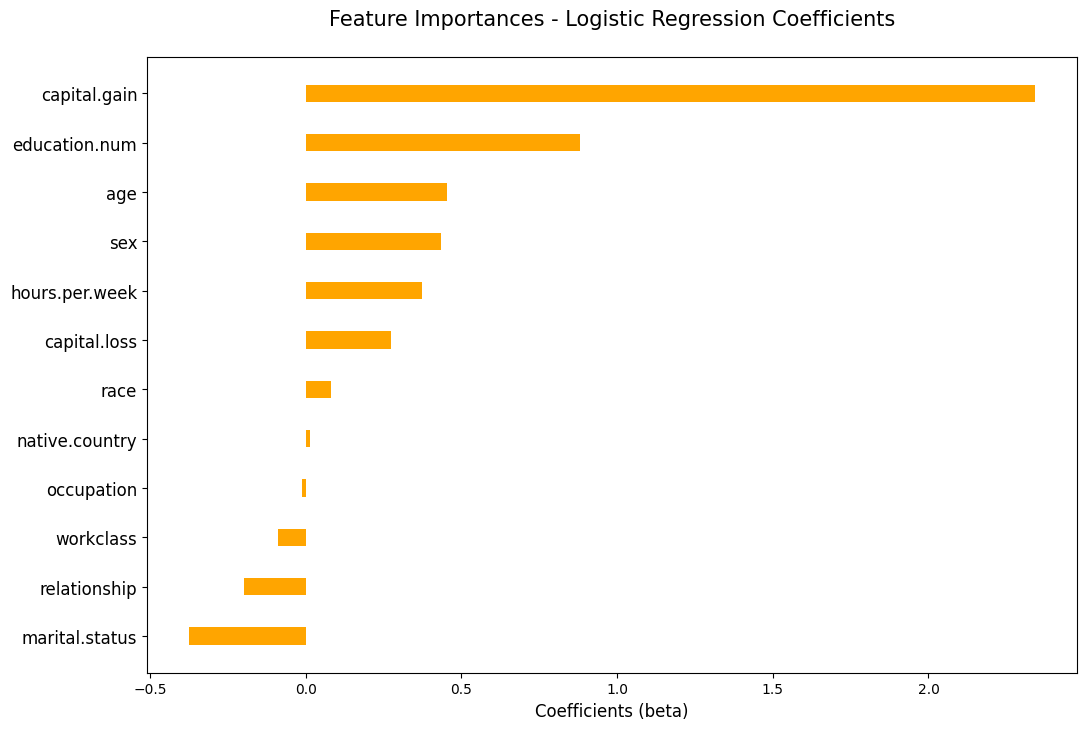

In [ ]:
# Logistic Regression 이진분류 모델의 회귀계수 시각화 하기

indices =  np.argsort(coef)  # 회귀계수 크기 순으로 정렬

plt.figure(figsize=(12, 8))
plt.barh(X_test.columns, coef[indices], .35, color='orange', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)
plt.xlabel('Coefficients (beta)', fontsize=12)
plt.title('Feature Importances - Logistic Regression Coefficients\n', fontsize=15)
plt.show()

### 머신러닝 결과의 시각화(2)

### (참고) 머신러닝 모델에서 변수의 영향력을 계산하는 방법

- 1) <b>회귀 모델의 회귀계수(Coefficients) </b>
    - X(피처)의 변량에 따라 y(타겟)의 변량이 어느 정도로 변하는지 수치화한 값
    - 변수 영향력의 방향(긍정, 부정)을 알 수 있다는 장점
    - 단점: 변수 스케일의 영향을 받기 때문에 스케일링 작업이 중요
    - scikit-learn의 `coef_` 메서드 사용


- 2) <b>트리 기반 모델의 MDI(Mean Decrease Impurity) 기반 중요도 </b>
    - 해당 피처가 모델에 적용될 때 전체적으로 분류 결과의 불순도(impurity)를 얼마나 감소시키는지를 측정
    - 불순도(impurity)의 측정 방법은 주로 entropy 혹은 Gini impurity로 계산
    - 피처가 모델이 분류를 잘 하는데 중요하게 작용할 수록 값이 커지게 됨
    - scikit-learn의 `feature_importances_` 메서드 사용


- 3) <b>치환(Permutation) 기반 중요도 </b>
    - 특정 피처의 값을 임의의 값으로 치환했을 떄 원래 데이터보다 예측 에러가 얼마나 더 커지는가를 측정 
    - 장점: 해석이 직관적이며, 계산에 시간이 오래 걸리지 않음
    - 단점: 변수간 상호의존성 때문에 특정 피처의 영향력을 과대 혹은 과소추정할 수 있음
    - scikit-learn의 `permutation_importance` 메서드 사용
    - eli5의 `PermutationImportance` 메서드 사용


- 4) <b>LGBM 모델의 분기 기반 중요도</b>
    - 기본값으로는 각 피처에서 결정을 내리기까지 분기(split)한 횟수를 나타냄
    - 파라미터 설정을 바꾸면 분기에서 얻어낸 정보 이득(gain)의 총합을 나타낼 수 있음
    - scikit-learn의 `feature_importances_` 메서드 사용
    - light gbm의 `plot_importance` 메서드 사용 


- 5) <b>XAI 커뮤니티에서 제안하는 게임이론 기반 Shapely 값</b>
    - 치환 피처 중요도(Permutation Importance)와 비슷하게 임의의 값으로 치환했을 때의 pay-off를 측정
    - 장점: 변수간 상호의존성에 영향을 받지 않으며, 계산시마다 값이 달라지지 않음, 변수 영향력의 방향(긍정, 부정)을 알 수 있음
    - 단점: 학습결과가 아니라 원 데이터에서 결정되기 때문에 아웃라이어에 약할 수 있음, 계산이 오래 걸림
    - shap의 `shap_values` 메서드 사용

각 방법론은 장단점이 뚜렷하고 계산방식이 다르므로 머신러닝 모델 해석시 상황에 맞게 적용하는 것이 중요합니다.

실제적인 응용은 문제를 풀면서 설명드리겠습니다.

In [ ]:
### Random Forest 이진분류 피처 중요도 분석하기

In [ ]:
# Random Forest 이진분류 모델의 피처 중요도 확인하기 # MDI

importances =  rfc.feature_importances_
importances 

array([0.20912143, 0.04871247, 0.14148977, 0.06690898, 0.08518582,
       0.11585685, 0.01852693, 0.01261543, 0.12933388, 0.04012147,
       0.11318493, 0.01894206])

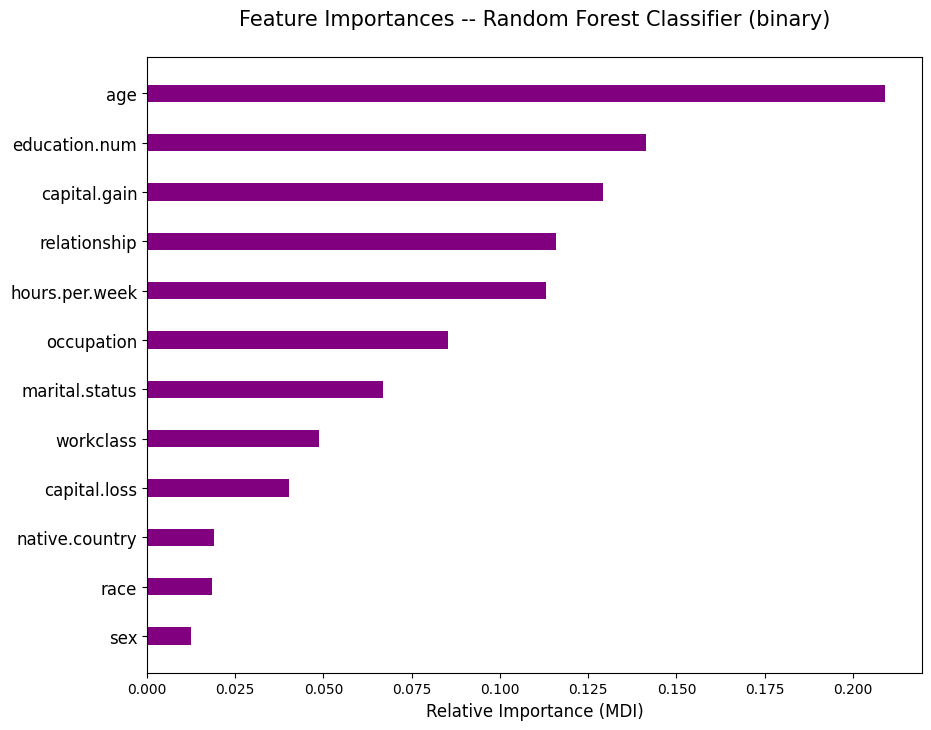

In [ ]:
# Random Forest 이진분류 모델의 피처 중요도 시각화 하기

indices = np.argsort(importances)     # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='purple', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Relative Importance (MDI)', fontsize=12)
plt.title('Feature Importances -- Random Forest Classifier (binary)\n', fontsize=15)
plt.show()

In [ ]:
 ### Gradient Boosting 이진분류 피처 중요도 분석하기

In [ ]:
# Gradient Boosting 이진분류 모델의 피처 중요도 확인하기

importances =  gbc.feature_importances_
importances  ###

array([5.87837092e-02, 5.51372125e-03, 2.10092686e-01, 4.33635936e-02,
       1.92692089e-02, 3.34389426e-01, 3.03009270e-04, 4.93262744e-03,
       2.22548066e-01, 6.02590869e-02, 3.97442162e-02, 8.00649340e-04])

In [ ]:
### LightGBM 이진분류 피처 중요도 분석하기

In [ ]:
# LightGBM 이진분류 모델의 피처 중요도 확인하기 ## 피처별 분기한 회수

importances =  lgbm.feature_importances_
importances ###

array([611, 174, 332, 162, 329, 150,  63,  50, 378, 264, 398,  89],
      dtype=int32)

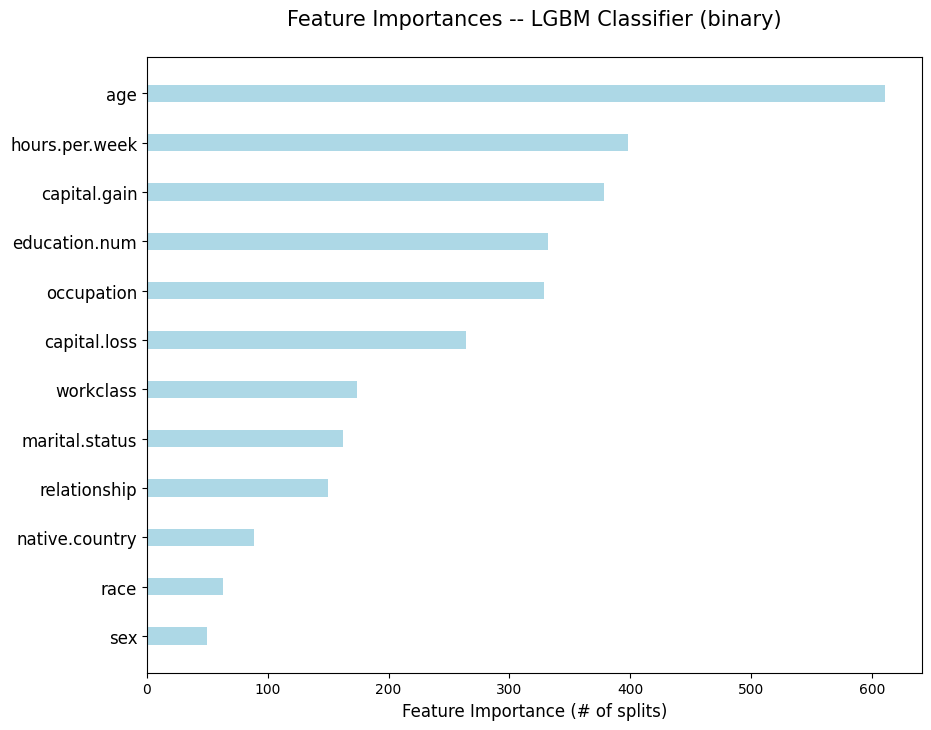

In [ ]:
# LightGBM 이진분류 모델의 피처 중요도 시각화 하기

indices = np.argsort(importances)   # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='lightblue', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Feature Importance (# of splits)', fontsize=12)
plt.title('Feature Importances -- LGBM Classifier (binary)\n', fontsize=15)
plt.show()

In [ ]:
### 요약: 소득 예측 이진분류 모델 피처 중요도 비교

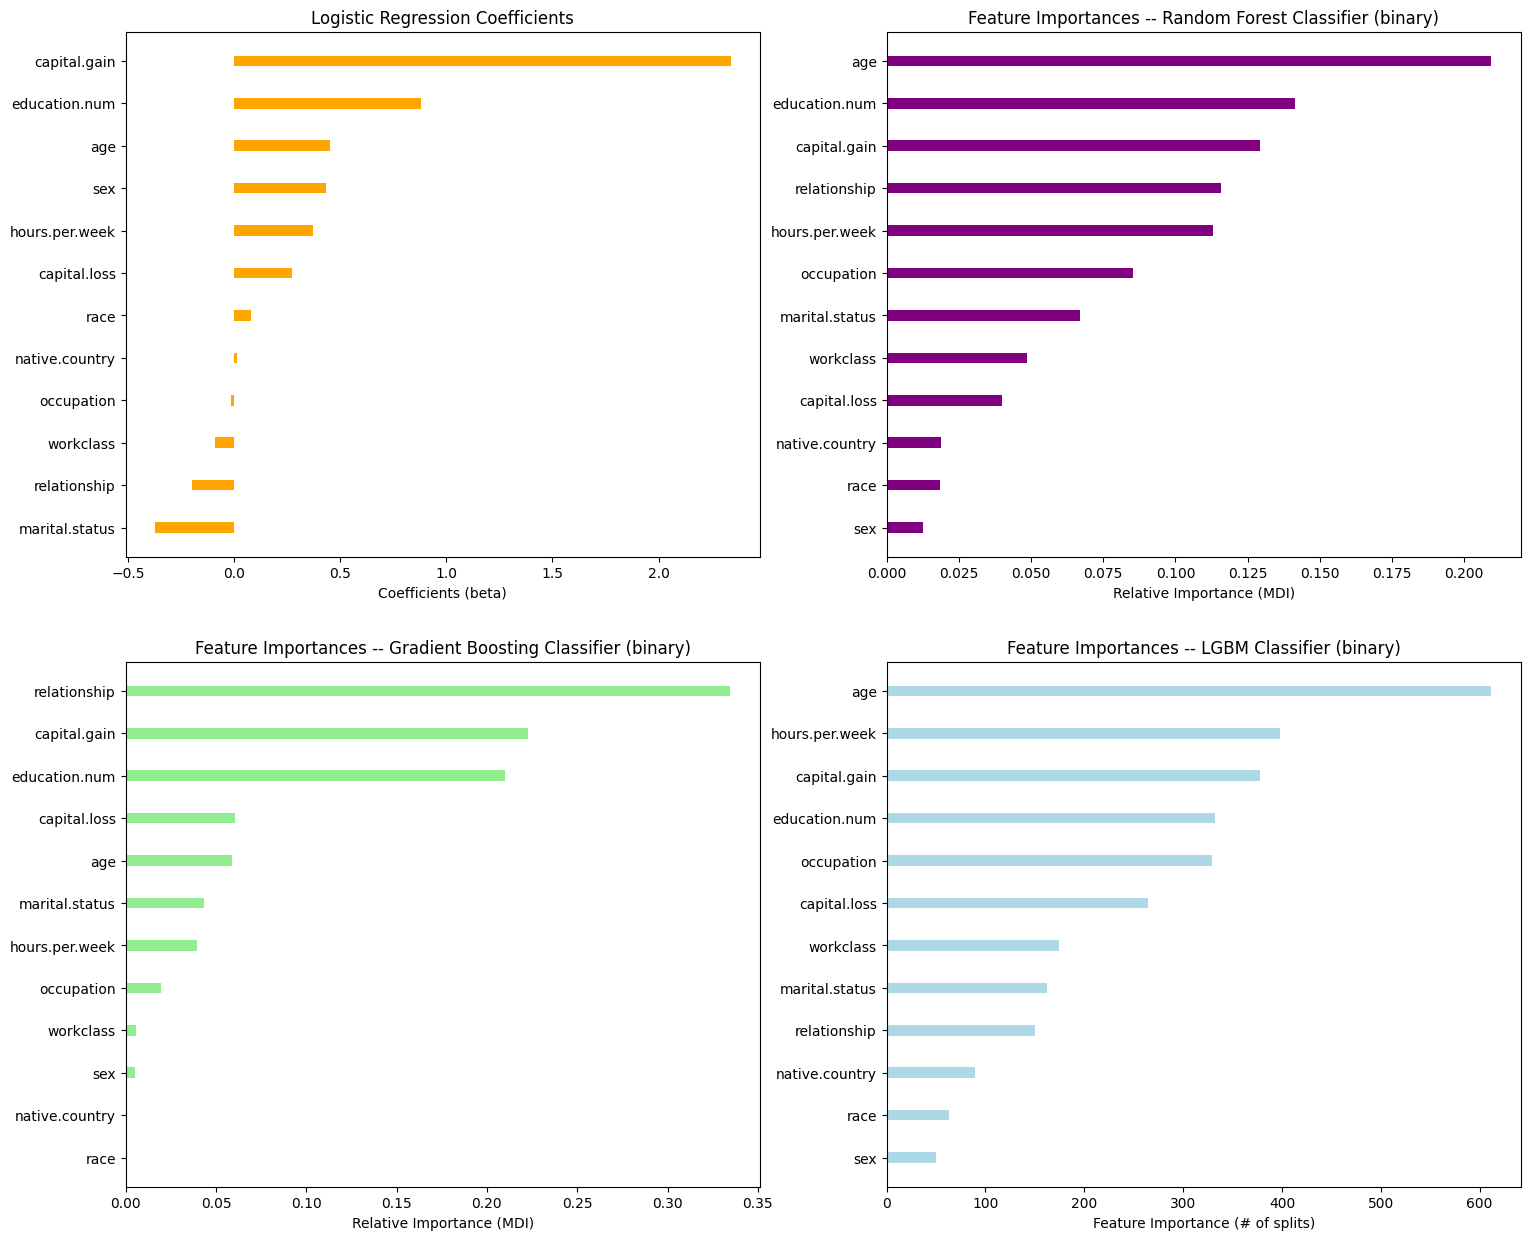

In [ ]:
# subplot을 이용하여 4개 이진분류 모델(logreg, gbc, rfc, lgbm)의 회귀계수 및 피처 중요도 시각화 비교하기

plt.figure(figsize=(18, 15))

plt.subplot(2, 2, 1) 
indices_logreg = np.argsort(coef)   ###

plt.title('Logistic Regression Coefficients')
plt.barh(X_test.columns, coef[indices_logreg], .25, color='orange')
plt.yticks(X_test.columns, X_test.columns[indices_logreg])
plt.xlabel('Coefficients (beta)')

plt.subplot(2, 2, 2)
importances_rfc = rfc.feature_importances_  ###
indices_rfc = np.argsort(importances_rfc)  ###

plt.title('Feature Importances -- Random Forest Classifier (binary)')
plt.barh(X_test.columns, importances_rfc[indices_rfc], .25, color='purple')
plt.yticks(X_test.columns, X_test.columns[indices_rfc])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2, 2, 3)
importances_gbc = gbc.feature_importances_  ###
indices_gbc =  np.argsort(importances_gbc)  ###

plt.title('Feature Importances -- Gradient Boosting Classifier (binary)')
plt.barh(X_test.columns, importances_gbc[indices_gbc], .25, color='lightgreen')
plt.yticks(X_test.columns, X_test.columns[indices_gbc])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2, 2, 4)
importances_lgbm = lgbm.feature_importances_  ###
indices_lgbm = np.argsort(importances_lgbm)  ###

plt.title('Feature Importances -- LGBM Classifier (binary)')
plt.barh(X_test.columns, importances_lgbm[indices_lgbm], .25, color='lightblue')
plt.yticks(X_test.columns, X_test.columns[indices_lgbm])
plt.xlabel('Feature Importance (# of splits)')

plt.show()

In [ ]:
# 다양한 모델을 써서 다양한 결과를 본다.

## <b> Ch 5. (실습) 머신러닝 **실전편**</b>

### 과제2: 이상탐지

- 데이터 소개
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [5]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings("ignore")

### Feature Engineering

In [7]:
# Feature Engineering: Step 1 데이터 확인하기

In [34]:
filepath = 'https://github.com/mchoimis/tsdl/raw/main/fraud/'

In [35]:
# 파일 불러오기
df = pd.read_csv(filepath + 'fraud.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
# 로드한 데이터의 맨 윗 30개 행 확인하기
df.head(30)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [12]:
# Missing 여부 확인하기
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# 불러온 데이터의 클래스 분포 확인하기
df.groupby(by=['Class']).count() # sql select count(*) from df group by Class  # agg function: min max mean count 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [59]:
print('Target class is ', '{0:0.4f}'. format(492/(284315+492)*100), '%') # imbalanced data set (class imbalance, target scarcity)

Target class is  0.1727 %


In [15]:
# Feature Engineering: Step 2 변수의 스케일 변환하기

In [60]:
# 데이터 스케일 조정하기
from sklearn.preprocessing import StandardScaler, RobustScaler

# std_scaler = StandardScaler()
rob_scaler = RobustScaler() ## 
print(df['Amount'])
print(df['Amount'].values)
print(df['Amount'].values.reshape(-1,1))

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# 원 데이터에서 Time 컬럼과 Amount 컬럼 제외하기
# df.drop(['Time','Amount'], axis=1, inplace=True) # True가 아니라 False라면 inplace 가 되지 않음

204234     52.95
23394     246.00
18702      15.00
203207     11.99
251485    181.95
           ...  
64834     267.18
24775      67.89
165587      1.00
251184      0.89
112378      4.99
Name: Amount, Length: 284807, dtype: float64
[ 52.95 246.    15.   ...   1.     0.89   4.99]
[[ 52.95]
 [246.  ]
 [ 15.  ]
 ...
 [  1.  ]
 [  0.89]
 [  4.99]]


In [55]:
#스케일 조정된 컬럼 추가하기
# scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

# df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=False)
# df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

#스케일 조정된 데이터 확인하기

# df.head()

In [18]:
# Feature Engineering: Step 3 샘플 데이터 나누기

In [61]:
# X와 y 데이터 셋 만들기
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

# 데이터 나누기
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

In [77]:
# 클래스의 skew 정도가 매우 높기 때문에 클래스간 분포를 맞추는 것이 필요합니다.
# 셔플링을 통해 레이블이 한쪽에 몰려있지 않도록 하겠습니다.

df = df.sample(frac=1) # 무작위로 샘플 추출

# 데이터 준비
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#normal_distributed_df.head()

# 데이터 셔플하기
new_df = normal_distributed_df.sample(frac=1, random_state=0)

# 셔플한 새로운 데이터 셋 확인
new_df.head()

## 아래에서 언더샘플링 할때 사용

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
68522,53031.0,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,...,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,0.76,1,-0.296793,-0.371962
206477,136226.0,1.905277,-0.535142,-1.372278,0.181490,-0.053044,-0.640174,0.155752,-0.267397,1.106421,...,0.043701,-0.630903,-0.002367,-0.058667,-0.042405,-0.045742,100.96,0,1.103333,0.605435
102445,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1,-0.293440,-0.193670
248271,153866.0,1.793639,-1.244012,-1.378175,-0.601649,-0.820411,-0.513729,-0.751443,-0.058609,-0.215212,...,-0.108699,-0.491031,-0.184772,-0.101976,-0.006303,0.004637,189.00,0,2.333543,0.812674
134201,80697.0,-0.321051,0.451756,1.978144,0.007713,-0.169016,0.769829,-0.084006,0.401915,0.097945,...,-0.002238,-0.250306,-0.892819,0.195663,0.205658,0.176861,11.50,0,-0.146720,-0.046934


In [40]:
df_original

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [37]:
df_plot = df.copy()

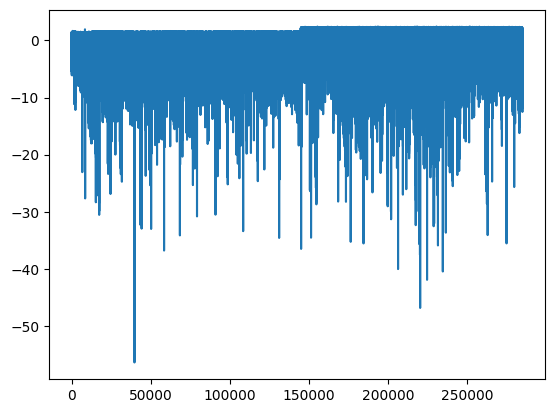

In [38]:
df_plot['V1'].plot()
plt.show()

<Axes: >

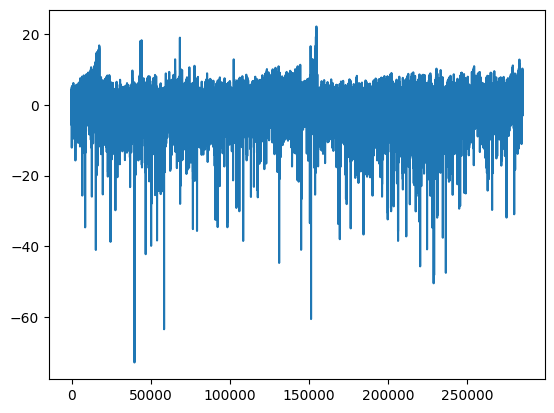

In [41]:
df_plot['V2'].plot()

<Axes: >

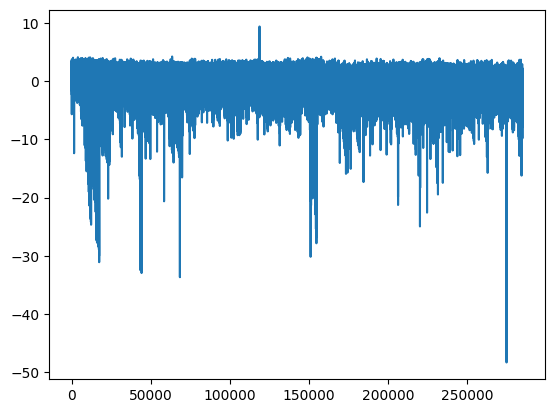

In [42]:
df_plot['V3'].plot()

<Axes: >

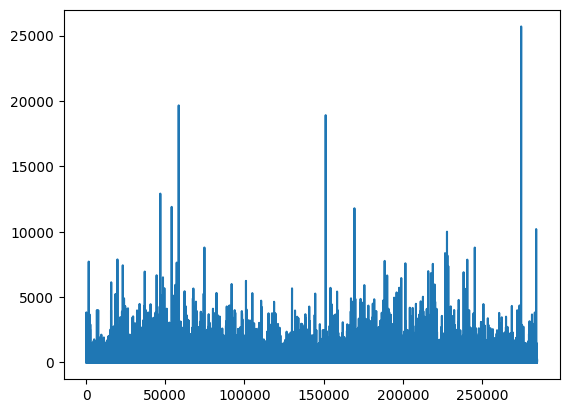

In [43]:
df_plot['Amount'].plot()

### 시계열 데이터 머신러닝 적용시 주의점

In [46]:
# 계량 기반 시계열 모델의 fitting

In [68]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.scaled_amount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

NotImplementedError: ignored

In [69]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.Amount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

NotImplementedError: ignored

In [70]:
# 머신러닝 기반 학습 모델의 fitting

In [71]:
# 재구축한 데이터의 클래스 분포 확인하기

new_df.groupby(by=['Class']).count() # stratified sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,scaled_amount,scaled_time
Class,,,,,,,,,,,,,,,,,,,,,
0,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [72]:
# X와 y 데이터 셋 만들기
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [73]:
# 언더샘플링을 위한 샘플 데이터 구축
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
# 모델 인풋에 들어가기 위한 데이터의 형태 바꾸기
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [75]:
# 학습시킬 모델 로드하기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "K Nearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "LightGBM Classifier": LGBMClassifier()
}

In [76]:
# 모델별 cross validation 한 결과의 평균 정확도 점수 출력하기
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, ':', round(training_score.mean(), 2) * 100, '% accuracy')

LogisticRegression : 92.0 % accuracy
KNeighborsClassifier : 65.0 % accuracy
SVC : 55.00000000000001 % accuracy
DecisionTreeClassifier : 91.0 % accuracy
RandomForestClassifier : 94.0 % accuracy
GradientBoostingClassifier : 94.0 % accuracy
LGBMClassifier : 94.0 % accuracy


### 동일한 데이터를 시계열로 처리할 때 vs 안할 때

In [78]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
78145,57389.0,1.252320,-0.740328,1.121754,-0.324178,-1.654252,-0.694579,-0.836625,-0.145130,-0.450314,...,0.002105,0.806917,0.184296,1.136822,-0.015851,0.028338,44.41,0,0.313142,-0.320763
127727,78442.0,-0.641579,-0.672523,0.929032,-2.563844,-0.200212,-0.320774,0.344659,-0.021200,-3.034746,...,0.258888,-0.378065,-0.142243,-0.594845,0.053751,0.109239,112.15,0,1.259694,-0.073427
190680,128939.0,2.043521,0.014738,-1.833420,0.232852,0.560494,-0.321627,-0.008735,0.014921,0.411033,...,0.308687,0.097803,-0.297848,0.181684,-0.070577,-0.046475,1.98,0,-0.279746,0.519825
237829,149412.0,-1.228419,-0.242352,0.141940,-0.482366,1.762839,-1.088283,0.557739,0.027228,0.160999,...,0.129470,0.464584,0.153903,-0.111982,0.039942,0.186032,79.54,0,0.804024,0.760347
142579,84802.0,-0.555442,1.094443,0.938871,1.485610,2.487871,4.479312,0.306391,0.562903,-1.049889,...,-0.427441,1.025181,0.347922,0.356353,-0.242144,-0.306716,37.85,0,0.221477,0.001292


In [79]:
# 시계열 단위로 바꿉니다
df.index = df['Time']
df.set_index('Time', inplace=True)

In [80]:
df.head(30)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
Time,,,,,,,,,,,,,,,,,,,,,
57389.0,1.252320,-0.740328,1.121754,-0.324178,-1.654252,-0.694579,-0.836625,-0.145130,-0.450314,0.506684,...,0.002105,0.806917,0.184296,1.136822,-0.015851,0.028338,44.41,0,0.313142,-0.320763
78442.0,-0.641579,-0.672523,0.929032,-2.563844,-0.200212,-0.320774,0.344659,-0.021200,-3.034746,0.819535,...,0.258888,-0.378065,-0.142243,-0.594845,0.053751,0.109239,112.15,0,1.259694,-0.073427
128939.0,2.043521,0.014738,-1.833420,0.232852,0.560494,-0.321627,-0.008735,0.014921,0.411033,-0.186930,...,0.308687,0.097803,-0.297848,0.181684,-0.070577,-0.046475,1.98,0,-0.279746,0.519825
149412.0,-1.228419,-0.242352,0.141940,-0.482366,1.762839,-1.088283,0.557739,0.027228,0.160999,-1.697133,...,0.129470,0.464584,0.153903,-0.111982,0.039942,0.186032,79.54,0,0.804024,0.760347
84802.0,-0.555442,1.094443,0.938871,1.485610,2.487871,4.479312,0.306391,0.562903,-1.049889,1.455201,...,-0.427441,1.025181,0.347922,0.356353,-0.242144,-0.306716,37.85,0,0.221477,0.001292
157548.0,2.040211,-0.146975,-2.955934,-0.578356,2.609358,3.142642,-0.416883,0.784393,0.359902,-0.351075,...,0.363485,0.604827,-0.264560,0.219671,-0.039209,-0.042787,1.98,0,-0.279746,0.855931
29209.0,-1.026844,0.846284,1.791740,0.493236,-0.642461,0.311220,0.038417,0.767037,-0.552714,-0.687767,...,0.000179,0.216122,0.026007,0.319282,-0.091676,-0.002626,44.99,0,0.321246,-0.651829
162511.0,1.710916,-0.927310,0.035772,1.179793,-0.897646,0.902637,-1.273300,0.563881,1.558436,0.325448,...,0.127975,0.203923,-0.405688,-0.612785,0.055678,-0.013083,100.00,0,1.089918,0.914238
125519.0,2.094913,-0.051876,-1.537010,0.130034,0.564274,-0.332391,0.206511,-0.256766,0.413521,0.027361,...,0.256100,0.061284,-0.148657,0.202826,-0.072644,-0.055334,17.99,0,-0.056033,0.479646


<Axes: xlabel='Time'>

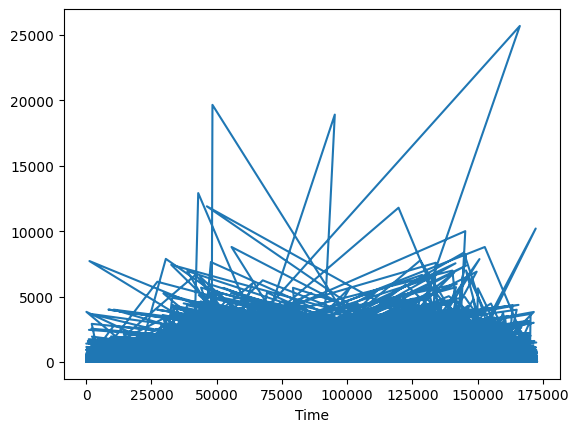

In [81]:
df['Amount'].plot()